# Bank Statement Analysis

## Loading Data

In [1]:

import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON data
with open('/content/P1- BankStatements.json') as f:
    data = json.load(f)

# Extract transactions
transactions = data['Account']['Transactions']['Transaction']

# Convert transactions to DataFrame
df = pd.DataFrame(transactions)

# Convert 'transactionTimestamp' to datetime and sort by it
df['transactionTimestamp'] = pd.to_datetime(df['transactionTimestamp'])
df.sort_values(by='transactionTimestamp', inplace=True)

# Display the first few rows of the DataFrame
df.head()


,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference
0,DEBIT,CARD,100.0,2180.80,2023-06-27 09:40:19+05:30,2023-06-27,S39488701,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
1,DEBIT,CARD,170.0,2010.80,2023-06-28 09:51:57+05:30,2023-06-28,S76862822,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
2,DEBIT,CARD,500.0,1510.80,2023-07-26 10:04:00+05:30,2023-07-26,S31451661,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
3,CREDIT,OTHERS,15.0,1525.80,2023-08-06 11:10:38+05:30,2023-07-31,S66463256,51888100006461IntPd01-05-2023 to 31-07-2023,NA
4,DEBIT,ATM,1000.0,525.80,2023-08-07 17:13:13+05:30,2023-08-07,S18475743,ATM/CASH/321917012791/XXXXXXXXXXXX8896,NA


## Transaction Analysis

In [2]:

# Calculate total number of transactions
total_transactions = df.shape[0]
total_transactions


985

**Total number of transactions:** 985

In [3]:

# Define small and large transactions
small_transaction_threshold = 500  # Define a threshold for small vs. large transactions
df['transactionSize'] = df['amount'].apply(lambda x: 'Small' if float(x) <= small_transaction_threshold else 'Large')

# Calculate distribution of transaction amounts
transaction_size_dist = df['transactionSize'].value_counts()
transaction_size_dist


transactionSize
Small    745
Large    240
Name: count, dtype: int64

**Distribution of transaction amounts (small vs. large):**


- Small Transactions: 745
- Large Transactions: 240


In [4]:

# Frequency of different transaction types (debit vs. credit)
transaction_type_freq = df['type'].value_counts()
transaction_type_freq


type
DEBIT     695
CREDIT    290
Name: count, dtype: int64

**Frequency of different transaction types (debit vs. credit):**


- Debit Transactions: 695
- Credit Transactions: 290


## Balance Analysis

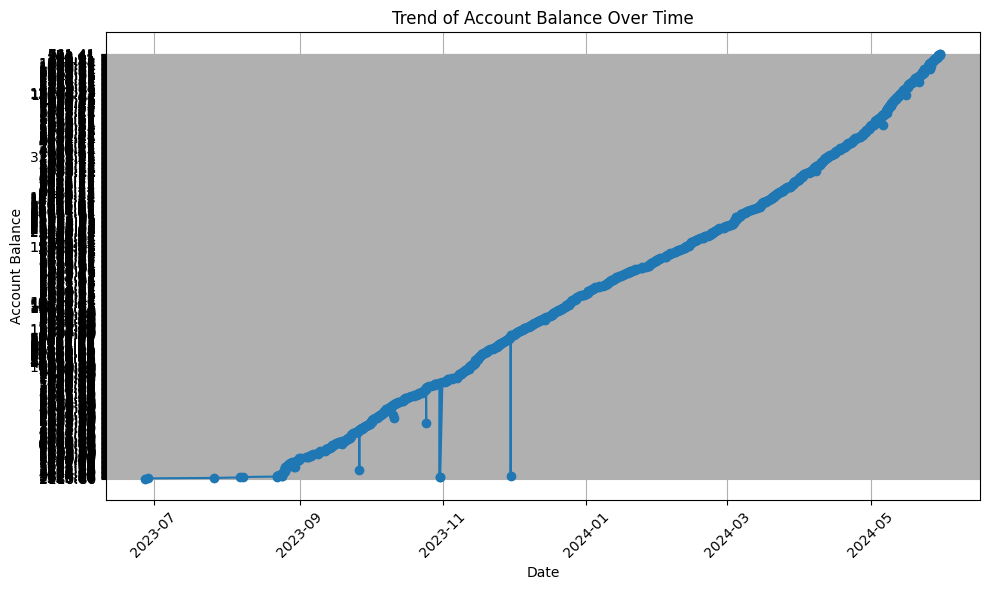

In [5]:

# Trend of the account balance over time
balance_trend = df[['transactionTimestamp', 'currentBalance']].drop_duplicates().reset_index(drop=True)

# Plotting the trend of account balance over time
plt.figure(figsize=(10, 6))
plt.plot(balance_trend['transactionTimestamp'], balance_trend['currentBalance'], marker='o')
plt.title('Trend of Account Balance Over Time')
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Trend of the account balance over time**

In [6]:

# Identify periods with significant changes in the account balance
balance_trend['currentBalance'] = balance_trend['currentBalance'].astype(float)
balance_trend['balance_change'] = balance_trend['currentBalance'].diff()
significant_changes = balance_trend[balance_trend['balance_change'].abs() > 1000]  # Arbitrary threshold for significant change
significant_changes


,transactionTimestamp,currentBalance,balance_change
6,2023-08-22 11:49:13+05:30,3524.80,3000.0
8,2023-08-23 08:17:48+05:30,2624.80,-1200.0
17,2023-08-25 10:24:38+05:30,2244.80,-2480.0
18,2023-08-25 10:39:35+05:30,794.80,-1450.0
36,2023-08-27 12:19:54+05:30,315.80,-1499.0
...,...,...,...
911,2024-05-17 18:51:36+05:30,1259.31,-1300.0
925,2024-05-21 05:47:33+05:30,1119.31,1070.0
930,2024-05-22 04:42:07+05:30,2454.31,2050.0
935,2024-05-22 20:21:48+05:30,6085.31,3920.0


**Periods with significant changes in account balance:**

In [7]:

# Display significant changes in balance
significant_changes


,transactionTimestamp,currentBalance,balance_change
6,2023-08-22 11:49:13+05:30,3524.80,3000.0
8,2023-08-23 08:17:48+05:30,2624.80,-1200.0
17,2023-08-25 10:24:38+05:30,2244.80,-2480.0
18,2023-08-25 10:39:35+05:30,794.80,-1450.0
36,2023-08-27 12:19:54+05:30,315.80,-1499.0
...,...,...,...
911,2024-05-17 18:51:36+05:30,1259.31,-1300.0
925,2024-05-21 05:47:33+05:30,1119.31,1070.0
930,2024-05-22 04:42:07+05:30,2454.31,2050.0
935,2024-05-22 20:21:48+05:30,6085.31,3920.0


## Spending Patterns

In [9]:

# Analyze the main categories of expenses
def categorize_expense(narration):
    if 'FILLING' in narration or 'FUEL' in narration:
        return 'Fuel'
    elif 'ECOM' in narration or 'SHOPPING' in narration:
        return 'Ecommerce'
    elif 'FOOD' in narration or 'RESTAURANT' in narration:
        return 'Food'
    elif 'ATM' in narration:
        return 'ATM Withdrawal'
    elif 'UPI' in narration:
        return 'UPI Transaction'
    else:
        return 'Other'

df['expenseCategory'] = df['narration'].apply(categorize_expense)

# Frequency and amount of spending in each category
expense_freq = df[df['type'] == 'DEBIT']['expenseCategory'].value_counts()
expense_amount = df[df['type'] == 'DEBIT'].groupby('expenseCategory')['amount'].apply(lambda x: ", ".join(x.astype(str)))
expense_freq, expense_amount


(expenseCategory
 UPI Transaction    688
 Fuel                 4
 ATM Withdrawal       3
 Name: count, dtype: int64,
 expenseCategory
 ATM Withdrawal                               1000.0, 10000.0, 2500.0
 Fuel                                       100.0, 170.0, 500.0, 60.0
 UPI Transaction    1.0, 1200.0, 140.0, 80.0, 30.0, 2480.0, 1450.0...
 Name: amount, dtype: object)

**Frequency and amount of spending in each category:**

In [10]:

expense_freq, expense_amount


(expenseCategory
 UPI Transaction    688
 Fuel                 4
 ATM Withdrawal       3
 Name: count, dtype: int64,
 expenseCategory
 ATM Withdrawal                               1000.0, 10000.0, 2500.0
 Fuel                                       100.0, 170.0, 500.0, 60.0
 UPI Transaction    1.0, 1200.0, 140.0, 80.0, 30.0, 2480.0, 1450.0...
 Name: amount, dtype: object)

## Income Analysis

In [11]:

# Analyze the main sources of income
def categorize_income(narration):
    if 'SALARY' in narration or 'PAY' in narration:
        return 'Salary'
    elif 'UPI' in narration:
        return 'UPI Credit'
    else:
        return 'Other'

df['incomeCategory'] = df['narration'].apply(categorize_income)

# Frequency and amount of income in each category
income_freq = df[df['type'] == 'CREDIT']['incomeCategory'].value_counts()
income_amount = df[df['type'] == 'CREDIT'].groupby('incomeCategory')['amount'].apply(lambda x: ", ".join(x.astype(str)))
income_freq, income_amount


(incomeCategory
 Salary        158
 UPI Credit    101
 Other          31
 Name: count, dtype: int64,
 incomeCategory
 Other         15.0, 1.0, 1.0, 51.0, 850.0, 600.0, 600.0, 170...
 Salary        350.0, 350.0, 180.0, 350.0, 1550.0, 1280.0, 11...
 UPI Credit    3000.0, 300.0, 400.0, 500.0, 300.0, 400.0, 750...
 Name: amount, dtype: object)

**Main sources of income:**

In [12]:

income_freq


incomeCategory
Salary        158
UPI Credit    101
Other          31
Name: count, dtype: int64

**Frequency and amount of income in each category:**

In [13]:

income_amount


incomeCategory
Other         15.0, 1.0, 1.0, 51.0, 850.0, 600.0, 600.0, 170...
Salary        350.0, 350.0, 180.0, 350.0, 1550.0, 1280.0, 11...
UPI Credit    3000.0, 300.0, 400.0, 500.0, 300.0, 400.0, 750...
Name: amount, dtype: object

## Alert Generation

In [14]:

# Identify unusual or suspicious transactions
suspicious_transactions = df[(df['amount'].astype(float) > 10000) | (df['amount'].astype(float) < 1)]
suspicious_transactions


,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference,transactionSize,expenseCategory,incomeCategory
275,CREDIT,UPI,37999.0,43892.80,2023-11-14 18:31:11+05:30,2023-11-14,S65593249,UPI/331812106847/183112/UPI/311999sshuklaaxl/P,NA,Large,UPI Transaction,UPI Credit
277,DEBIT,UPI,16500.0,27391.80,2023-11-14 18:49:41+05:30,2023-11-14,S66498670,UPI/331814821452/184941/UPI/7007674186paytm/UP,NA,Large,UPI Transaction,UPI Credit
291,CREDIT,CASH,45000.0,58180.80,2023-11-16 15:51:14+05:30,2023-11-16,00707977,BY CASH,NA,Large,Other,Other
295,DEBIT,UPI,21000.0,35400.80,2023-11-17 16:34:54+05:30,2023-11-17,S82212459,UPI/332126038252/163454/UPI/msjsrfashioneazypa,NA,Large,UPI Transaction,UPI Credit
332,DEBIT,UPI,19000.0,16625.80,2023-11-29 16:15:33+05:30,2023-11-29,S50294642,UPI/333335900423/161532/UPI/mrking25icici/UPI,NA,Large,UPI Transaction,UPI Credit
333,DEBIT,UPI,12700.0,3925.80,2023-11-29 17:09:47+05:30,2023-11-29,S52850056,UPI/369921004440/170947/UPI/9310460780ibl/UPI,NA,Large,UPI Transaction,UPI Credit
353,DEBIT,UPI,13000.0,865.80,2023-12-05 15:50:06+05:30,2023-12-05,S8245037,UPI/333950785257/155006/UPI/bharatpe9006616689,NA,Large,UPI Transaction,UPI Credit
570,CREDIT,UPI,20000.0,23483.91,2024-02-24 18:55:15+05:30,2024-02-24,S58360773,UPI/442192582411/185516/UPI/8795417446-2ybl/Pa,NA,Large,UPI Transaction,UPI Credit
572,DEBIT,UPI,20000.0,3683.91,2024-02-25 11:08:34+05:30,2024-02-25,S77431539,UPI/405633427538/110833/UPI/8318914152axl/UPI,NA,Large,UPI Transaction,UPI Credit
576,CREDIT,UPI,20000.0,23664.91,2024-02-25 20:08:58+05:30,2024-02-25,S3167582,UPI/442272156503/200859/UPI/8318914152ybl/Paym,NA,Large,UPI Transaction,UPI Credit


**Unusual or suspicious transactions:**

In [15]:

suspicious_transactions


,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference,transactionSize,expenseCategory,incomeCategory
275,CREDIT,UPI,37999.0,43892.80,2023-11-14 18:31:11+05:30,2023-11-14,S65593249,UPI/331812106847/183112/UPI/311999sshuklaaxl/P,NA,Large,UPI Transaction,UPI Credit
277,DEBIT,UPI,16500.0,27391.80,2023-11-14 18:49:41+05:30,2023-11-14,S66498670,UPI/331814821452/184941/UPI/7007674186paytm/UP,NA,Large,UPI Transaction,UPI Credit
291,CREDIT,CASH,45000.0,58180.80,2023-11-16 15:51:14+05:30,2023-11-16,00707977,BY CASH,NA,Large,Other,Other
295,DEBIT,UPI,21000.0,35400.80,2023-11-17 16:34:54+05:30,2023-11-17,S82212459,UPI/332126038252/163454/UPI/msjsrfashioneazypa,NA,Large,UPI Transaction,UPI Credit
332,DEBIT,UPI,19000.0,16625.80,2023-11-29 16:15:33+05:30,2023-11-29,S50294642,UPI/333335900423/161532/UPI/mrking25icici/UPI,NA,Large,UPI Transaction,UPI Credit
333,DEBIT,UPI,12700.0,3925.80,2023-11-29 17:09:47+05:30,2023-11-29,S52850056,UPI/369921004440/170947/UPI/9310460780ibl/UPI,NA,Large,UPI Transaction,UPI Credit
353,DEBIT,UPI,13000.0,865.80,2023-12-05 15:50:06+05:30,2023-12-05,S8245037,UPI/333950785257/155006/UPI/bharatpe9006616689,NA,Large,UPI Transaction,UPI Credit
570,CREDIT,UPI,20000.0,23483.91,2024-02-24 18:55:15+05:30,2024-02-24,S58360773,UPI/442192582411/185516/UPI/8795417446-2ybl/Pa,NA,Large,UPI Transaction,UPI Credit
572,DEBIT,UPI,20000.0,3683.91,2024-02-25 11:08:34+05:30,2024-02-25,S77431539,UPI/405633427538/110833/UPI/8318914152axl/UPI,NA,Large,UPI Transaction,UPI Credit
576,CREDIT,UPI,20000.0,23664.91,2024-02-25 20:08:58+05:30,2024-02-25,S3167582,UPI/442272156503/200859/UPI/8318914152ybl/Paym,NA,Large,UPI Transaction,UPI Credit


In [16]:

# Generate alerts for low balance or high expenditure periods
low_balance_alerts = df[df['currentBalance'].astype(float) < 500]
high_expenditure_alerts = df[df['amount'].astype(float) > 5000]
low_balance_alerts, high_expenditure_alerts


(       type    mode  amount currentBalance      transactionTimestamp  \
 26    DEBIT     UPI  1000.0         175.80 2023-08-25 16:56:59+05:30   
 27    DEBIT     UPI    30.0         145.80 2023-08-25 18:23:59+05:30   
 28   CREDIT  OTHERS    51.0         196.80 2023-08-25 18:37:02+05:30   
 29    DEBIT     UPI     1.0         195.80 2023-08-26 15:06:16+05:30   
 36    DEBIT     UPI  1499.0         315.80 2023-08-27 12:19:54+05:30   
 ..      ...     ...     ...            ...                       ...   
 976   DEBIT     UPI   240.9         178.41 2024-05-29 08:53:10+05:30   
 977   DEBIT     UPI   130.0          48.41 2024-05-29 12:01:51+05:30   
 978  CREDIT     UPI   300.0         348.41 2024-05-29 17:10:42+05:30   
 979   DEBIT     UPI   245.0         103.41 2024-05-29 17:12:19+05:30   
 980   DEBIT     UPI    80.0          23.41 2024-05-29 17:57:40+05:30   
 
       valueDate      txnId                                          narration  \
 26   2023-08-25  S18720196     UPI/3237

**Low balance alerts:**

In [17]:

low_balance_alerts


,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference,transactionSize,expenseCategory,incomeCategory
26,DEBIT,UPI,1000.0,175.80,2023-08-25 16:56:59+05:30,2023-08-25,S18720196,UPI/323737522524/165659/UPI/9455566771ibl/Paym,NA,Large,UPI Transaction,UPI Credit
27,DEBIT,UPI,30.0,145.80,2023-08-25 18:23:59+05:30,2023-08-25,S22642750,UPI/360372011100/182358/UPI/9580229953ybl/Paym,NA,Small,UPI Transaction,UPI Credit
28,CREDIT,OTHERS,51.0,196.80,2023-08-25 18:37:02+05:30,2023-08-25,S23309045,IMPS/P2A/323718489753/PHONEPEPRIVATEL/IMPSAXB9111,NA,Small,Other,Other
29,DEBIT,UPI,1.0,195.80,2023-08-26 15:06:16+05:30,2023-08-26,S51405185,UPI/323834868218/150615/UPI/BHARATPE9006655445,NA,Small,UPI Transaction,UPI Credit
36,DEBIT,UPI,1499.0,315.80,2023-08-27 12:19:54+05:30,2023-08-27,S80757332,UPI/323955508725/121953/UPI/9455566771ibl/Paym,NA,Large,UPI Transaction,UPI Credit
...,...,...,...,...,...,...,...,...,...,...,...,...
976,DEBIT,UPI,240.9,178.41,2024-05-29 08:53:10+05:30,2024-05-29,S43796126,UPI/415078559131/085310/UPI/gpayrechargeicici/,NA,Small,UPI Transaction,UPI Credit
977,DEBIT,UPI,130.0,48.41,2024-05-29 12:01:51+05:30,2024-05-29,S53022278,UPI/415085026291/120151/UPI/gpay-11223375885ok,NA,Small,UPI Transaction,UPI Credit
978,CREDIT,UPI,300.0,348.41,2024-05-29 17:10:42+05:30,2024-05-29,S66468359,UPI/415061496542/171043/UPI/7786043828ibl/Paym,NA,Small,UPI Transaction,UPI Credit
979,DEBIT,UPI,245.0,103.41,2024-05-29 17:12:19+05:30,2024-05-29,S66551053,UPI/451629965942/171219/UPI/9910619719ibl/Paym,NA,Small,UPI Transaction,UPI Credit


**High expenditure alerts:**

In [18]:

high_expenditure_alerts


,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference,transactionSize,expenseCategory,incomeCategory
78,CREDIT,OTHERS,5500.0,6339.80,2023-09-14 21:14:51+05:30,2023-09-14,S38051220,IMPS/P2A/325721171918/PHONEPEPRIVATEL/IMPSAXB9111,NA,Large,Other,Other
275,CREDIT,UPI,37999.0,43892.80,2023-11-14 18:31:11+05:30,2023-11-14,S65593249,UPI/331812106847/183112/UPI/311999sshuklaaxl/P,NA,Large,UPI Transaction,UPI Credit
277,DEBIT,UPI,16500.0,27391.80,2023-11-14 18:49:41+05:30,2023-11-14,S66498670,UPI/331814821452/184941/UPI/7007674186paytm/UP,NA,Large,UPI Transaction,UPI Credit
285,DEBIT,UPI,10000.0,12970.80,2023-11-15 17:48:21+05:30,2023-11-15,S7201813,UPI/368589163186/174821/UPI/8905552611ikwik/UP,NA,Large,UPI Transaction,UPI Credit
291,CREDIT,CASH,45000.0,58180.80,2023-11-16 15:51:14+05:30,2023-11-16,00707977,BY CASH,NA,Large,Other,Other
295,DEBIT,UPI,21000.0,35400.80,2023-11-17 16:34:54+05:30,2023-11-17,S82212459,UPI/332126038252/163454/UPI/msjsrfashioneazypa,NA,Large,UPI Transaction,UPI Credit
296,DEBIT,UPI,5200.0,30200.80,2023-11-17 18:32:29+05:30,2023-11-17,S88311015,UPI/368715646136/183228/UPI/971167234646axl/UP,NA,Large,UPI Transaction,UPI Credit
332,DEBIT,UPI,19000.0,16625.80,2023-11-29 16:15:33+05:30,2023-11-29,S50294642,UPI/333335900423/161532/UPI/mrking25icici/UPI,NA,Large,UPI Transaction,UPI Credit
333,DEBIT,UPI,12700.0,3925.80,2023-11-29 17:09:47+05:30,2023-11-29,S52850056,UPI/369921004440/170947/UPI/9310460780ibl/UPI,NA,Large,UPI Transaction,UPI Credit
351,CREDIT,OTHERS,7560.0,13925.80,2023-12-05 07:08:30+05:30,2023-12-05,S85798345,NEFT-AXNPN33391170193-PHONEPE PRIVATE LIMITED-...,922020004688715,Large,Other,Salary
